# Concurrency vs Parallelism
### Threads vs. Processes
Content in this notebook is mainly from here:  
https://medium.com/contentsquare-engineering-blog/multithreading-vs-multiprocessing-in-python-ece023ad55a  
and here (more extensive):  
https://medium.com/@bfortuner/python-multithreading-vs-multiprocessing-73072ce5600b


### 6 Facts about threads and processes in python
1. There can only be one thread running at any given time in a python process.
2. Multiprocessing is parallelism. Multithreading is concurrency.
3. Multiprocessing is for increasing speed. Multithreading is for hiding latency.
4. Multiprocessing is best for computations. Multithreading is best for IO.
5. If you have CPU heavy tasks, use multiprocessing with n_process = n_cores and never more. Never!
6. If you have IO heavy tasks, use multithreading

## Articles on threads in python:
https://www.geeksforgeeks.org/multithreading-python-set-1/    
https://www.geeksforgeeks.org/multithreading-in-python-set-2-synchronization/  

### Using an abstraction layer
We can then implement use of threads and processes in much the same way:   
`ThreadPoolExecutor`  
`ProcessPoolExecutor`

In [1]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing

import time 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cpu_heavy_time_it(x):
    """purpose is to use much cpu time"""
    print('I am number:', x) 
    start = time.time()
    count = 0
    for i in range(10**8):
        count += i
    stop = time.time()
    return start, stop

In [3]:
import webget
def io_heavy_time_it(x):
    """purpose is to use much IO latency time"""
    url = 'https://api.github.com/repositories/'
    print('I am number:', x)
    start = time.time()
    count = 0
    for i in range(1,50): 
        new_url = url+str(i)
        print(new_url)
        try:
            webget.download(new_url,to=f'todelete/todelete{i}.txt')
        except:
            print('Exception occured')
    stop = time.time()
    return start, stop

In [5]:
def multithreading(func, args, workers=5):
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

def multiprocessing(func, args, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

In [6]:
# 8 tasks running in 4 threads
#multithreading(cpu_heavy_time_it, range(1,9),4)
io_heavy_time_it('')

I am number: 
https://api.github.com/repositories/1
Exception occured
https://api.github.com/repositories/2
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/5
Exception occured
https://api.github.com/repositories/6
Exception occured
https://api.github.com/repositories/7
Exception occured
https://api.github.com/repositories/8
Exception occured
https://api.github.com/repositories/9
Exception occured
https://api.github.com/repositories/10
Exception occured
https://api.github.com/repositories/11
Exception occured
https://api.github.com/repositories/12
Exception occured
https://api.github.com/repositories/13
Exception occured
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/15
Exception occured
https://api.github.com/repositories/16
Exception occured
https://api.github.com/repositories/17
Exception occured
https://api.github.com/rep

(1583143842.181417, 1583143854.8400276)

In [9]:
def visualize_runtimes(results, title):
    print(results) 
    start, stop = np.array(results).T
    # horizontal bar plot plt.barh
    plt.barh(range(len(start)), stop - start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.xlim(0, 22.5)
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.title(title)
    return stop[-1] - start[0]
# visualize_runtimes(multithreading(cpu_heavy, range(4), 4), "Multithreading")


###### plt.subplot(1, 2, 1)
visualize_runtimes(multithreading(cpu_heavy_time_it, range(1,5)), "Multithreading")
plt.subplot(1, 2, 2)
visualize_runtimes(multiprocessing(cpu_heavy_time_it, range(1,5)), "Multiprocessing")
plt.show()


I am number: 1
https://api.github.com/repositories/1
I am number: 2
https://api.github.com/repositories/1
I am number: 3
https://api.github.com/repositories/1
I am number:I am number:  4
https://api.github.com/repositories/15
https://api.github.com/repositories/1

Exception occured
https://api.github.com/repositories/2
Exception occuredException occured
https://api.github.com/repositories/2

https://api.github.com/repositories/2
Exception occuredException occured
https://api.github.com/repositories/2

https://api.github.com/repositories/2
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
Exception occuredhttps://api.github.com/repositories/4

https://api.github.com/repositories/4Exception occured

https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Excepti

Exception occured
https://api.github.com/repositories/20
Exception occuredException occured

https://api.github.com/repositories/18https://api.github.com/repositories/17Exception occured



Exception occured
https://api.github.com/repositories/21
Exception occured
https://api.github.com/repositories/18
Exception occuredException occured

https://api.github.com/repositories/19
https://api.github.com/repositories/19Exception occured
https://api.github.com/repositories/18

Exception occured
Exception occuredException occured
https://api.github.com/repositories/20
https://api.github.com/repositories/19

https://api.github.com/repositories/22Exception occured

Exception occured


Exception occured
https://api.github.com/repositories/20
Exception occured
https://api.github.com/repositories/21
Exception occured
Exception occuredhttps://api.github.com/repositories/20

Exception occured
https://api.github.com/repositories/23
https://api.github.com/repositories/21
Exception occured
https://api.g

Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/37
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/38
Exception occured
https://api.github.com/repositories/37
Exception occured
https://api.github.com/repositories/37
Exception occured
https://api.github.com/repositories/39
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/38
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/39
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.g

Exception occured
https://api.github.com/repositories/5
Exception occured
https://api.github.com/repositories/3
Exception occured
Exception occured
https://api.github.com/repositories/6
Exception occured
https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/7
Exception occured
https://api.github.com/repositories/5
Exception occured
https://api.github.com/repositories/8
Exception occured
https://api.github.com/repositories/6
Exception occured
https://api.github.com/repositories/7
Exception occured
https://api.github.com/repositories/9
Exception occured
https://api.github.com/repositories/8
Exception occured
https://api.github.com/repositories/9
Exception occured
https://api.github.com/repositories/10
Exception occured
https://api.github.com/repositories/11
Exception occured
https://api.github.com/repositories/10
Exception occured
https://api.github.com/repositories/12
Exception occured
https://api.github.com/repositories/11
Exception occured
https:/

Exception occured
https://api.github.com/repositories/45
Exception occured
https://api.github.com/repositories/47
Exception occured
https://api.github.com/repositories/46
Exception occured
https://api.github.com/repositories/48
Exception occured
https://api.github.com/repositories/49
Exception occured
https://api.github.com/repositories/47
Exception occured
Exception occured
https://api.github.com/repositories/48
Exception occured
https://api.github.com/repositories/49
Exception occured
[(1583144213.4119482, 1583144225.4974077), (1583144213.4135618, 1583144226.140592), (1583144213.429262, 1583144226.0233414), (1583144213.438032, 1583144225.7174425), (1583144213.43816, 1583144226.4521048), (1583144225.497637, 1583144239.5266771), (1583144225.7175763, 1583144240.0690017)]


TypeError: 'module' object is not callable

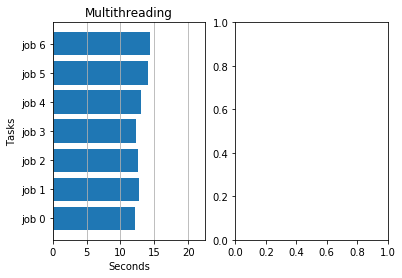

In [10]:
plt.subplot(1, 2, 1)
visualize_runtimes(multithreading(io_heavy_time_it, range(1,8)), "Multithreading")
plt.subplot(1, 2, 2)
visualize_runtimes(multiprocessing(cpu_heavy_time_it, range(1,8)), "Multiprocessing")
plt.show()

# Exercise with threads and processes
1. Create a function that can take a list of image urls with http and using a thread pool can download the images to disk
  - test the function with dummy images from https://dummyimage.com/600x400/000/fff (/image_size/background_color/foreground_color can be set programmatically to load many different images. See function )
2. Create a function that can use process pool to calculate fibonacci sequence using this recursive fibonacci function:  

```python
def fibo(n):
    if n <= 1:
        return n
    else:
        return(fibo(n-1) + fibo(n-2))
```
  - Make your function so that it can take a sequence of numbers and return the corresponding fibbonaci values   
  
HINT: the processor time needed for each calculation increases exponentially as higher numbers are given to the function. Therefore it makes sense to create processes equivalent to amount of cpu cores on the computer to distribute the work load as it gets really heavy moving beyond 35 (on my computer)

In [8]:
def get_img_urls():
    urls, filenames = [],[]
    for height in range(100,600,200):
        for width in range(100,600,200):
            for background in range(0,16,2):
                for foreground in range(0,16,2):
                    # print('{:X}'.format(i)*3)
                    urls.append('https://dummyimage.com/{width}x{height}/{background:x}{background:x}{background:x}/{foreground:x}{foreground:x}{foreground:x}'
                                .format(height=height,width=width,background=background,foreground=foreground))
                    filenames.append('img{width}x{height}-{background:x}{background:x}{background:x}-{foreground:x}{foreground:x}{foreground:x}.png'
                                .format(height=height,width=width,background=background,foreground=foreground))
    return urls,filenames

In [11]:

def fibo(n):
    if n <= 1:
        return n
    else:
        return(fibo(n-1) + fibo(n-2))

n = 35
print('fibonacci of {} is: {}'.format(n,fibo(n)))
# check if the number of terms is valid

print("Fibonacci sequence ranging from 0 and up to n:")
for i in range(n+1):
   print(fibo(i))

fibonacci of 35 is: 9227465
Fibonacci sequence ranging from 0 and up to n:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465


In [12]:
%%timeit
for x in [2,3,4,20,34,35]:
    fibo(x)


4.83 s ± 96.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
